# 7324 Assignment 1: Data Wrangling

### Steps:
1. Create a dataframe from the csv data file 7324.a1.data.csv found in the 7324.a1.zip file.Display using head()	  
2. Use the dataframe info() method to find the columns (features) with missing values. Then, replace any missing values with the median value of the column. Display dataframe with head().  
3. Use the dataframe hist function to identify any features that are capped either hi or lo. Report on any you find. 
4. Write a function that takes one argument. if the arg is even, return arg / 2, otherwise (if odd) return arg+1. Apply this function to column C. Refer to Albon Cookbook 3.16.  Display dataframe with head().  
5. Create a new feature (column) called G that is the sum of B and D.   Display dataframe with head().  
6. In the column 'score', convert the column rank to integer values: Hi=3  Medium=2 Lo=1.   Display dataframe with head().  
7. Use one-hot-encoding for the column 'state' such that the column 'state' is replaced by one-hot encoded columns.  Display dataframe with head().   
7. Create and display a heatmap that shows highly correlated features. Report any features that are highly correlated with values > 0.90 or < -0.90  
9. Assume column A is to be as the  target value for machine learning. Move column A to the first column to last column in the dataframe so it can be easily extracted for supervised learning. Rename as 'target'.  Display dataframe with head().  


#### 1.  Create a dataframe from the csv data file 7324.a1.data.csv found in the 7324.a1.zip file. Display using head()

In [32]:
# read_csv and display with head()
import pandas as pd
# path to data
data_file = '../data/7324.a1.data.csv'
# read data file
dataframe = pd.read_csv(data_file)

dataframe.head()


,A,B,C,D,E,F,rank,state
0,47,46,3.0,43,43,43,Lo,CA
1,47,48,11.0,30,30,30,Hi,TX
2,68,50,95.0,52,52,52,Medium,TX
3,13,34,NaN,73,73,73,Medium,FL
4,78,37,51.0,40,40,45,Lo,CA


#### 2.  Use the dataframe info() method to find the columns (features) with missing values.

In [33]:
# Replace any missing values with the median value of the column. Show results using info()
dataframe.info()
dataframe['C'] = dataframe['C'].fillna(dataframe['C'].mean())
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    int64  
 1   B       100 non-null    int64  
 2   C       98 non-null     float64
 3   D       100 non-null    int64  
 4   E       100 non-null    int64  
 5   F       100 non-null    int64  
 6   rank    100 non-null    object 
 7   state   100 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    int64  
 1   B       100 non-null    int64  
 2   C       100 non-null    float64
 3   D       100 non-null    int64  
 4   E       100 non-null    int64  
 5   F       100 non-null    int64  
 6   rank    100 non-null    object 
 7   state   100 non-null    

#### 3. Use the dataframe hist function to identify any features that are capped either hi or lo. Report on any you find.

It appears that feature B, while scaled wildy, is capped hi


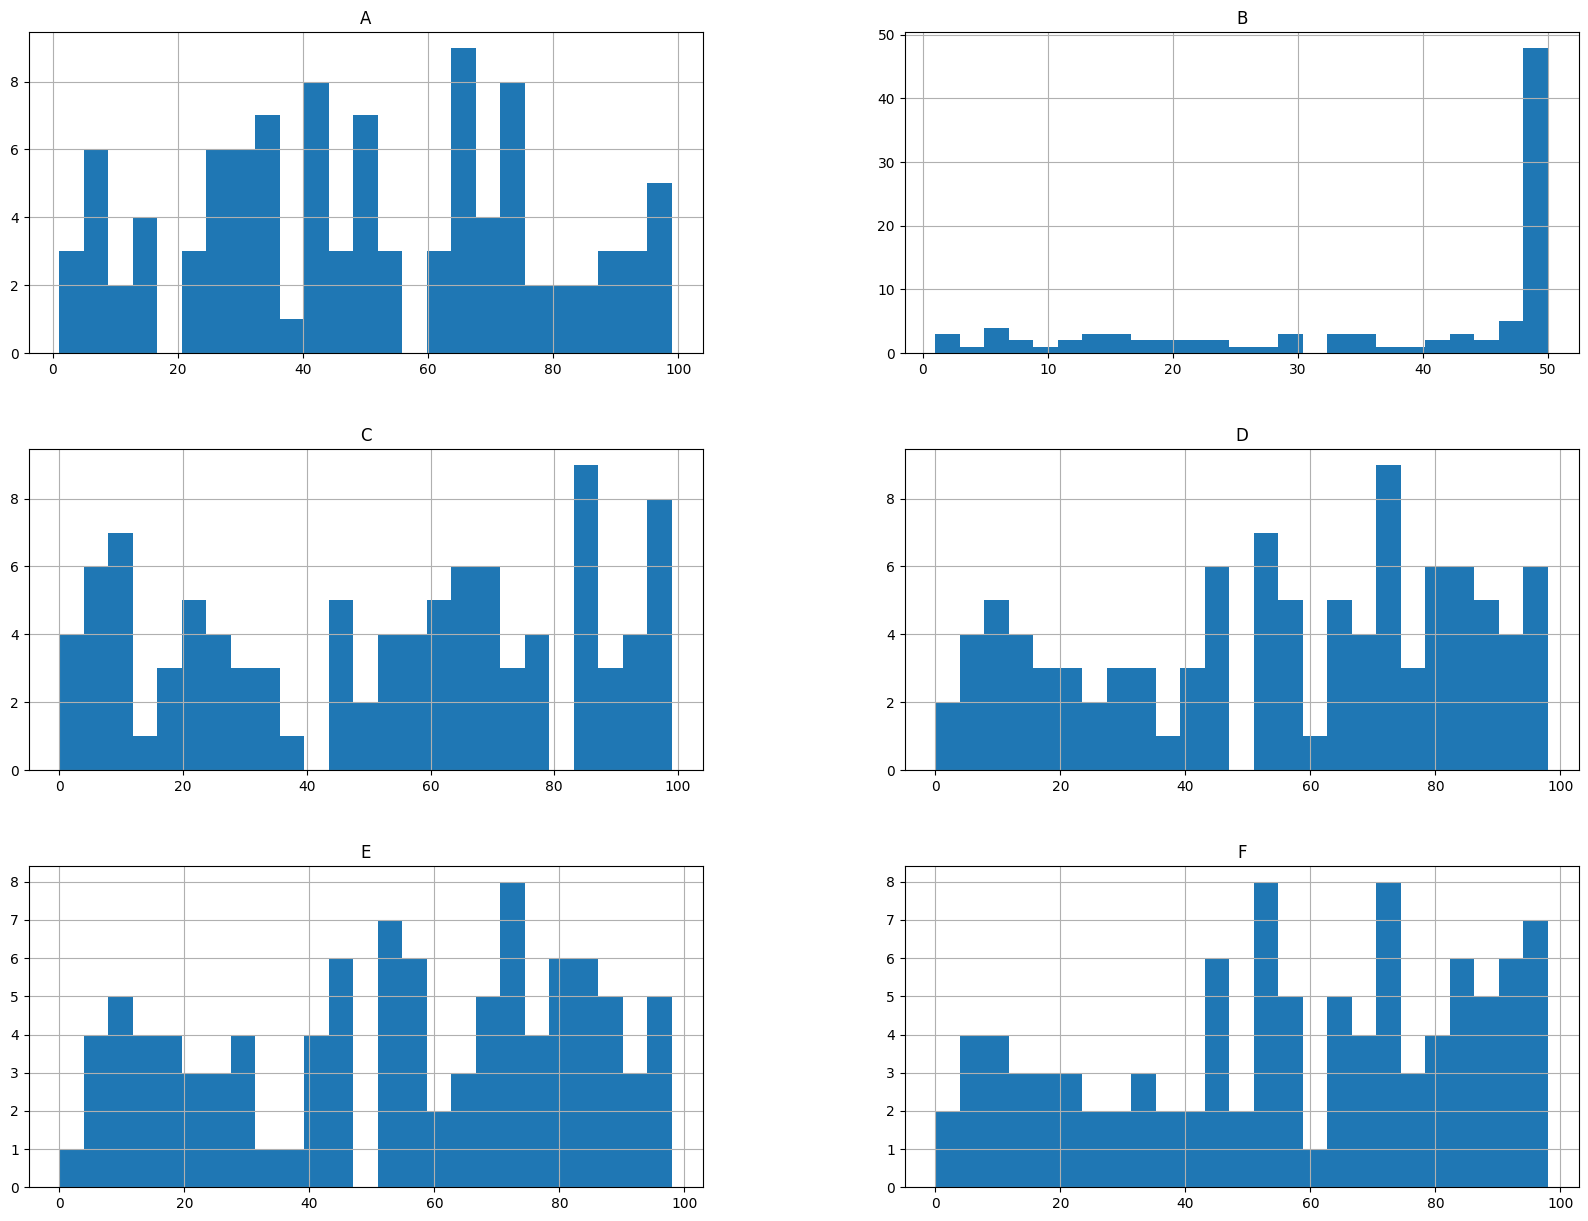

In [34]:
# find any capped features and use print statement to report any found or none found
# tip: see p49 in Geron: Hands on Machine Learning
import matplotlib as mpl
dataframe.hist(bins=25, figsize=(20,15))
print(f'It appears that feature B, while scaled wildy, is capped hi')

#### 4. Write a function that takes one argument. if the arg is even, return arg / 2, otherwise (if odd) return arg+1. Apply this function to column C. Refer to Albon Cookbook 3.16

In [35]:
# defining a function
def even_odd_transformer(val):
    return val / 2 if val % 2 == 0 else val + 1
# using functional programming
dataframe['C'] = dataframe['C'].apply(lambda val: val / 2 if val % 2 == 0 else val + 1)
dataframe.head()

,A,B,C,D,E,F,rank,state
0,47,46,4.000000,43,43,43,Lo,CA
1,47,48,12.000000,30,30,30,Hi,TX
2,68,50,96.000000,52,52,52,Medium,TX
3,13,34,53.346939,73,73,73,Medium,FL
4,78,37,52.000000,40,40,45,Lo,CA


#### 5. Create a new feature (column) called G that is the sum of B and D.  

In [36]:
# create column G as sum of B and D. Display with head()
dataframe['G'] = dataframe['B'] + dataframe['D']
dataframe.head()

,A,B,C,D,E,F,rank,state,G
0,47,46,4.000000,43,43,43,Lo,CA,89
1,47,48,12.000000,30,30,30,Hi,TX,78
2,68,50,96.000000,52,52,52,Medium,TX,102
3,13,34,53.346939,73,73,73,Medium,FL,107
4,78,37,52.000000,40,40,45,Lo,CA,77


#### 6.  In the column 'score', convert the column rank to integer values: Hi=3 Medium=2 Lo=1

In [37]:
# Convert score to integer ordinal values. Display results with head()
def rank_to_ord(val):
    if val == 'Hi':
        return 3
    if val == 'Medium':
        return 2
    if val == 'Lo':
        return 1

dataframe['score'] = dataframe['rank'].apply(rank_to_ord)

dataframe.head()

rank_mapper = {
    "Lo": 1,
    "Medium": 2,
    "Hi": 3
}

dataframe['score'].replace(rank_mapper)

dataframe.head()

,A,B,C,D,E,F,rank,state,G,score
0,47,46,4.000000,43,43,43,Lo,CA,89,1
1,47,48,12.000000,30,30,30,Hi,TX,78,3
2,68,50,96.000000,52,52,52,Medium,TX,102,2
3,13,34,53.346939,73,73,73,Medium,FL,107,2
4,78,37,52.000000,40,40,45,Lo,CA,77,1


#### 7. Replace the column 'state' using one-hot-encoding

In [38]:
# hint: use the panda get_dummies(..) Be sure to convert your ordinal text first since the get_dummies will one-hot ALL the text columns. 
dataframe = pd.concat([dataframe, pd.get_dummies(dataframe.state, prefix = 'state')], axis = 1)
dataframe.drop(['state'], axis = 1, inplace = True)
dataframe.head()


,A,B,C,D,E,F,rank,G,score,state_CA,state_FL,state_GA,state_TX
0,47,46,4.000000,43,43,43,Lo,89,1,1,0,0,0
1,47,48,12.000000,30,30,30,Hi,78,3,0,0,0,1
2,68,50,96.000000,52,52,52,Medium,102,2,0,0,0,1
3,13,34,53.346939,73,73,73,Medium,107,2,0,1,0,0
4,78,37,52.000000,40,40,45,Lo,77,1,1,0,0,0


#### 8. Create and display a heatmap that shows highly correlated features. Report any features that are highly correlated with values > 0.90 or < -0.90  

#### 9. Assume columnA is to be as the the target value for machine learning. Move column A to the first column to last column in the dataframe and rename as 'target' so it can be easily extracted for supervised learning.